**Particle Physics Event Classification**




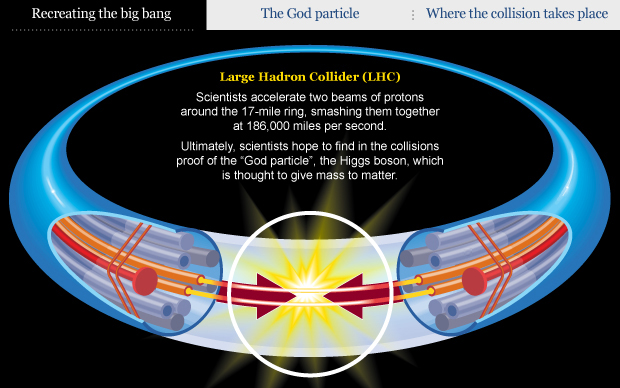
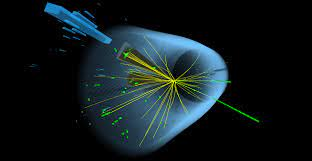



**Objective**
The primary goal of this machine learning project is to develop a model that can accurately predict whether a given set of experimental features corresponds to a signal or background event. Successful classification contributes to the advancement of particle physics research by automating the identification of events that may indicate the presence of specific particles or phenomena.




Signals are those particles which are not yet studied by the physicists and background particles are those which physcicts have knowledge of.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data.csv')
data.head(5)

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,9.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


***Exploratory Data Analysis***

---

In [ ]:
data.shape

(250000, 33)

In [ ]:
data.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.416643,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.482458,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,9.000000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


The variables prefixed with PRI (for PRImitives) are “raw” quantities
about the bunch collision as measured by the detector, essentially the momenta of particles.
Variables prefixed with DER (for DERived) are quantities computed from the primitive features.

In [ ]:
data.describe(include='O')

,Label
count,250000
unique,2
top,b
freq,164333


In [ ]:
#Finding label's counts of value present.
data['Label'].value_counts()

b    164333
s     85667
Name: Label, dtype: int64

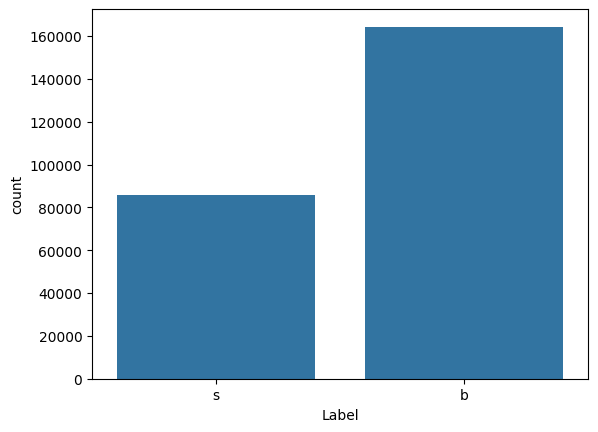

In [ ]:
# Plotting countplot to visualize whether dataset has imbalanced or balanced target variable.
sns.countplot(x=data["Label"], data=data)
plt.show()

In [ ]:
# Checking for Duplicate values
data.duplicated().sum()

0

In [ ]:
# Zero Variance check
data.var()

EventId                        5.208354e+09
DER_mass_MMC                   1.651168e+05
DER_mass_transverse_met_lep    1.249261e+03
DER_mass_vis                   1.666982e+03
DER_pt_h                       4.052046e+03
DER_deltaeta_jet_jet           2.065543e+05
DER_mass_jet_jet               4.329276e+05
DER_prodeta_jet_jet            2.052270e+05
DER_deltar_tau_lep             6.129498e-01
DER_pt_tot                     4.961085e+02
DER_sum_pt                     1.338791e+04
DER_pt_ratio_lep_tau           7.135906e-01
DER_met_phi_centrality         1.424645e+00
DER_lep_eta_centrality         2.057500e+05
PRI_tau_pt                     5.023014e+02
PRI_tau_eta                    1.473987e+00
PRI_tau_phi                    3.300628e+00
PRI_lep_pt                     4.868608e+02
PRI_lep_eta                    1.600180e+00
PRI_lep_phi                    3.300076e+00
PRI_met                        1.082061e+03
PRI_met_phi                    3.284151e+00
PRI_met_sumet                  1

***Missing Value Treatment***

In [ ]:
#Checking existence of missing value
data.isnull().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [ ]:
data.columns[data.dtypes=='float']

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta',
       'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

In [ ]:
data.columns[data.dtypes=='int64']

Index(['PRI_jet_num'], dtype='object')

In [ ]:
#Setting event id as index
data.set_index('EventId', inplace=True)

In [ ]:
#Weight column is given by physicist to normalize the probablilities of event happening
# but it will not be present in test scenario hence we will be deleting it.

data.drop('Weight',axis=1,inplace=True)

In [ ]:
# Finding relation between Primitive missing subleading transverse energy and at what are the mean values for
# signal and Background.
data.pivot_table('PRI_met_sumet', index='Label')
# The mean value of missing subleading transverse energy is higher for signals compared to bakground.

,PRI_met_sumet
Label,
b,212.117114
s,235.419518


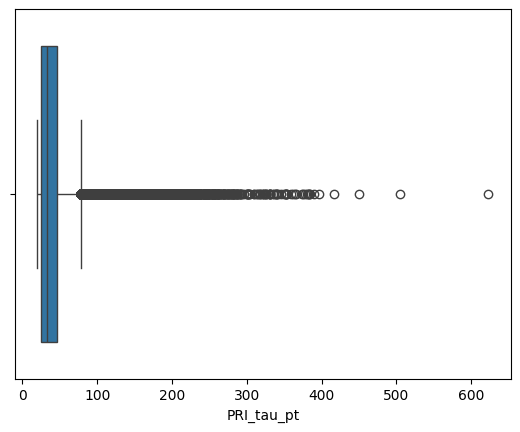

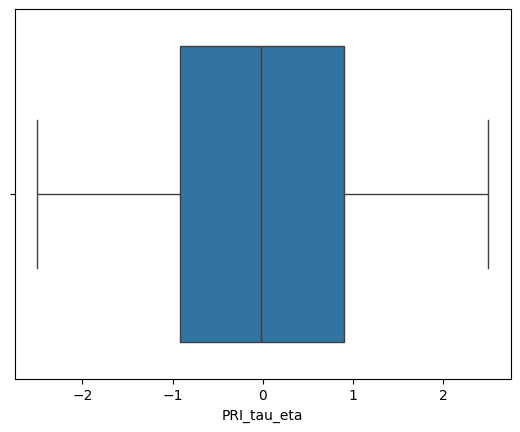

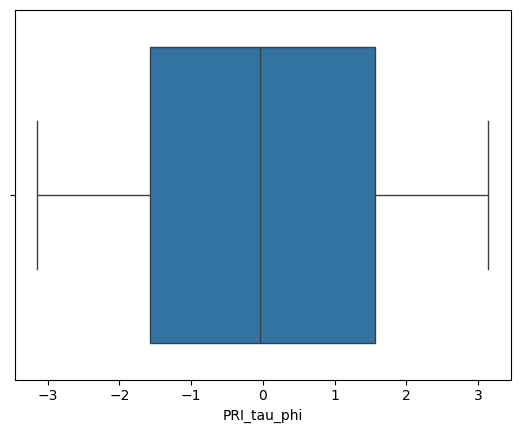

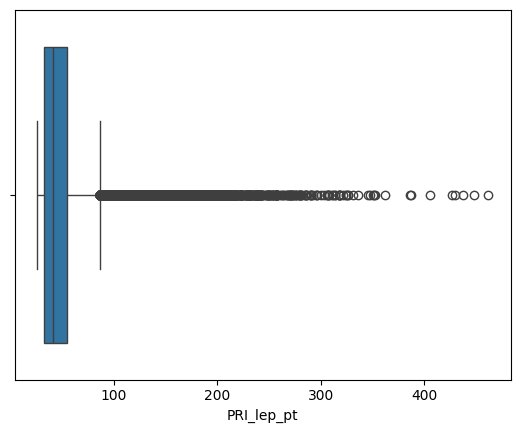

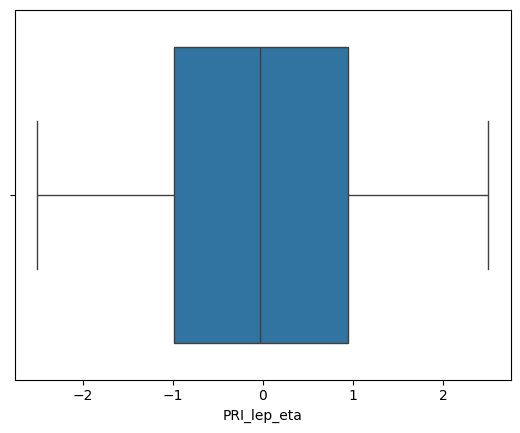

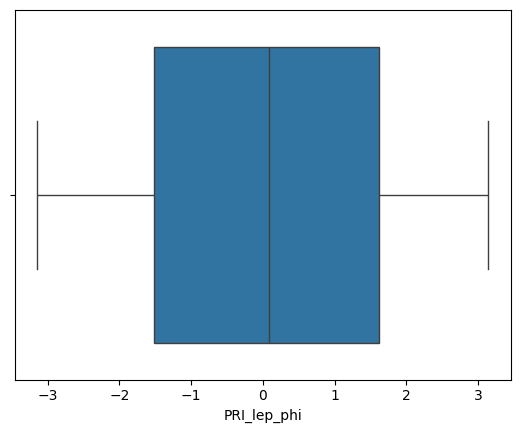

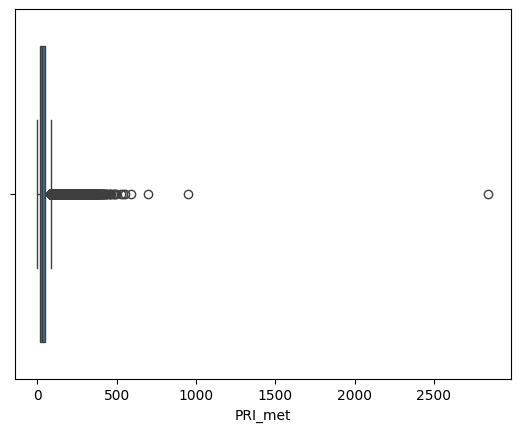

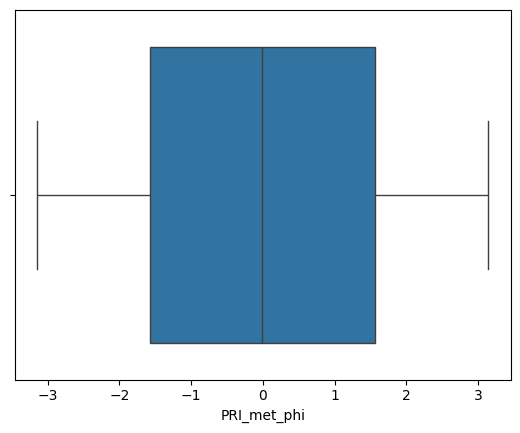

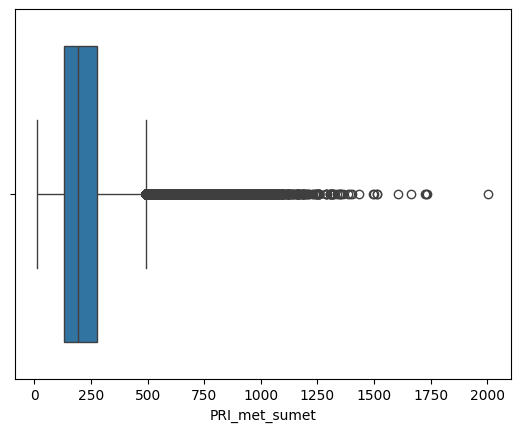

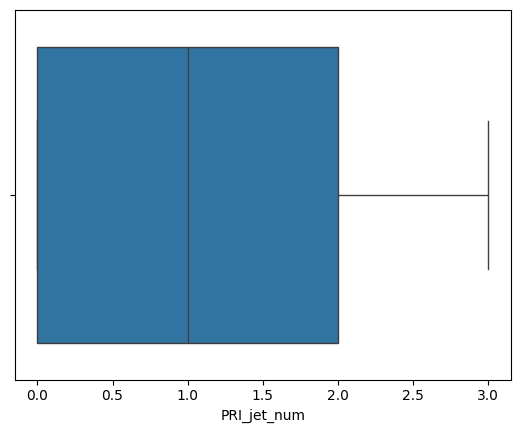

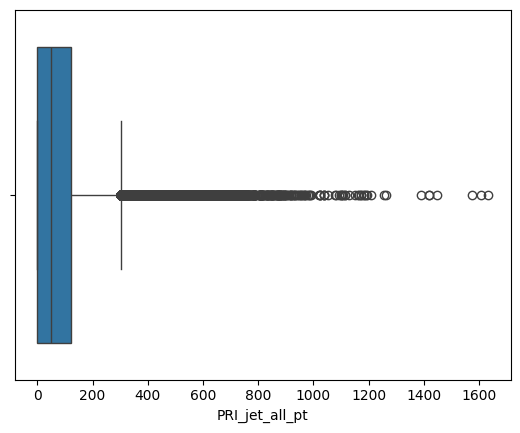

In [ ]:
#Checking outliers for primitive features.
pri_lst=['PRI_tau_pt',
       'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num',
       'PRI_jet_all_pt']
for i in pri_lst:
  sns.boxplot(x=i,data=data)
  plt.show()


In [ ]:
outliers_pri=['PRI_tau_pt','PRI_lep_pt','PRI_met','PRI_met_sumet']

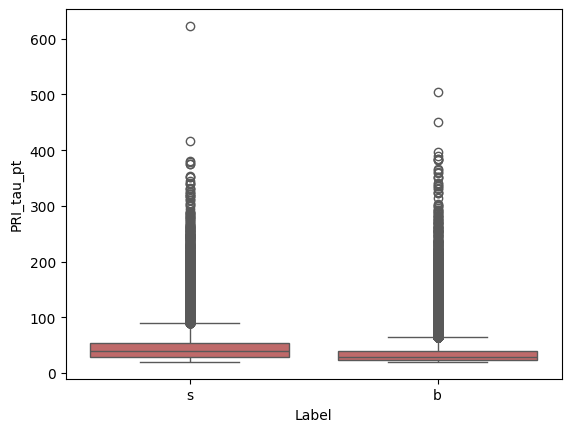

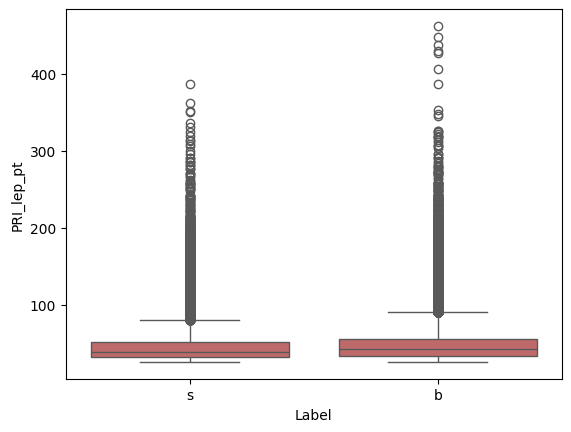

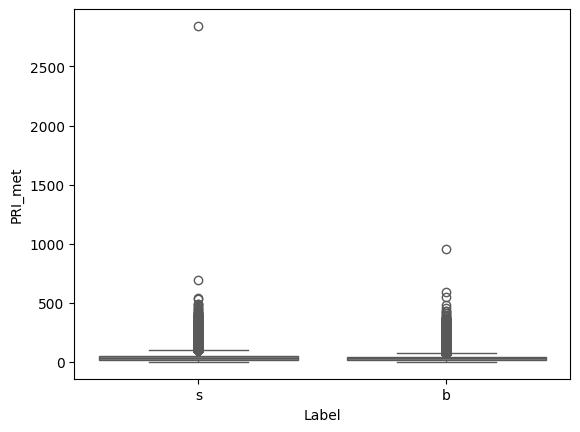

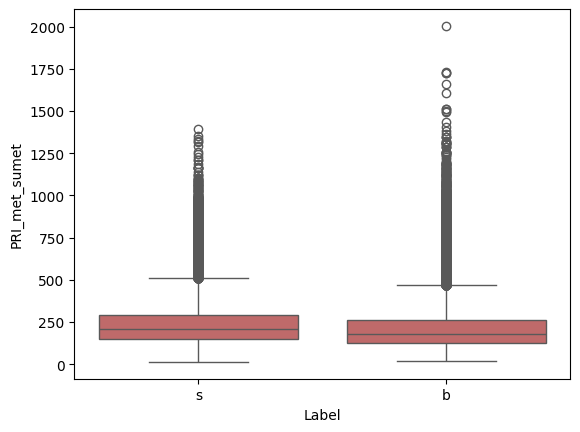

In [ ]:
# Does presence of outliers tells us something about signal's presence?
for _ in outliers_pri:
   sns.boxplot(x='Label',y=_,data=data,color='indianred')
   plt.show()

In [ ]:
# By above boxplot we can safely say that outliers are not indicative of some desirable event.
#Hence we would be doing outlier treatment.
for out in data[outliers_pri]:
  q3=data[out].quantile(0.75)
  q1=data[out].quantile(0.25)
  iqr=q3-q1
  upper=q3+1.5*iqr
  lower=q1-1.5*iqr
  data[out].clip(lower,upper,inplace=True)

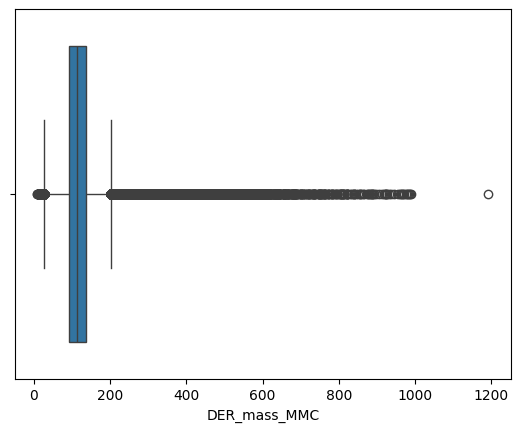

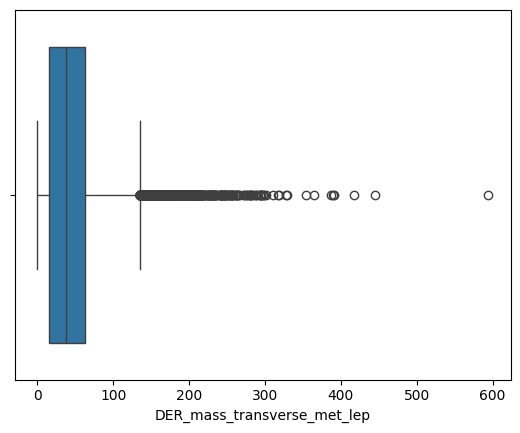

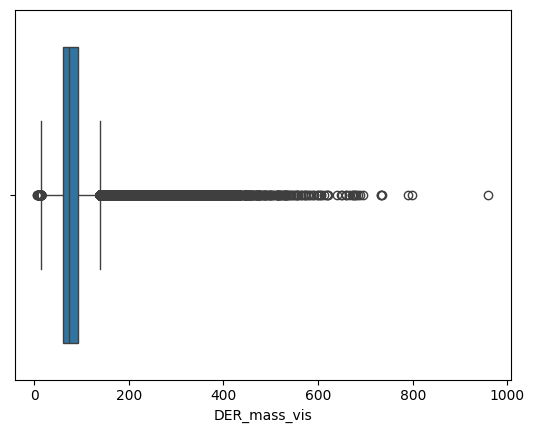

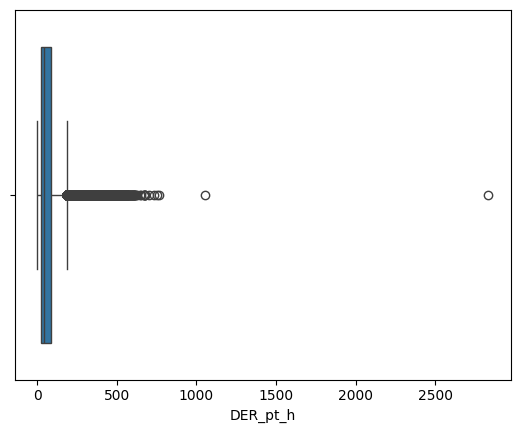

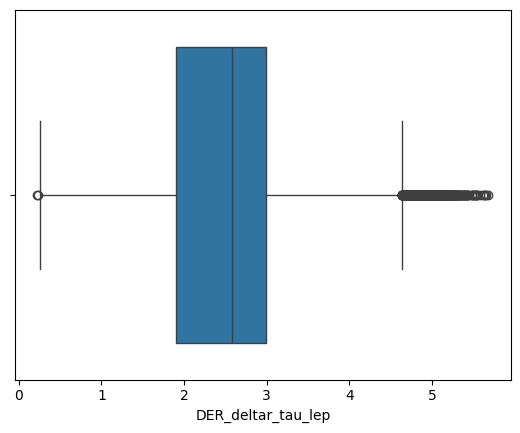

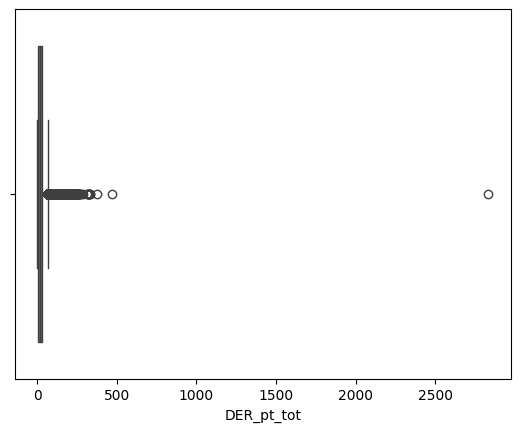

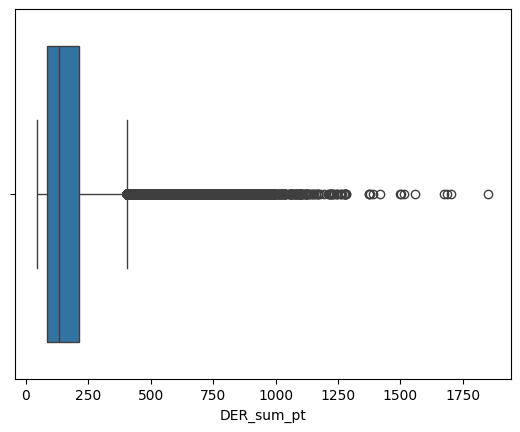

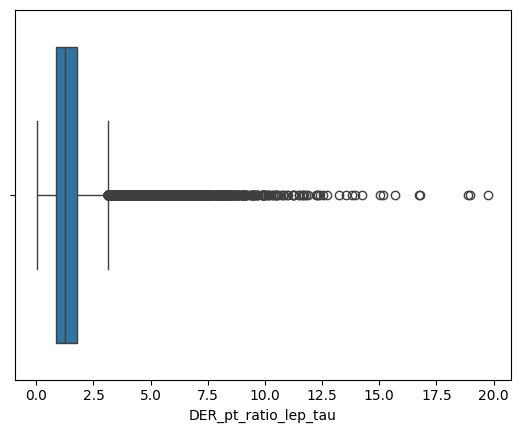

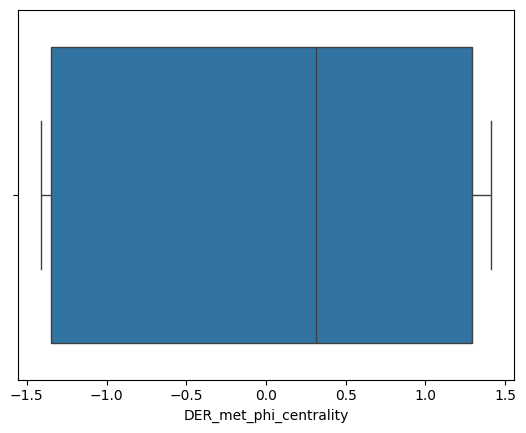

In [ ]:
#Boxplot to check for outliers in derived features.

DRE_list=['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality']
for a in DRE_list:
   sns.boxplot(x=a,data=data)
   plt.show()


In [ ]:
outliers_dre=['DER_mass_MMC','DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau']

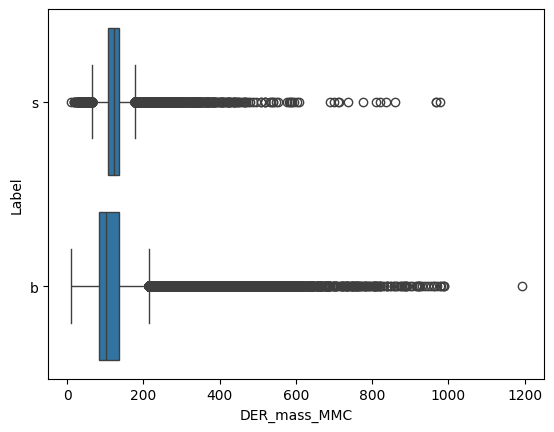

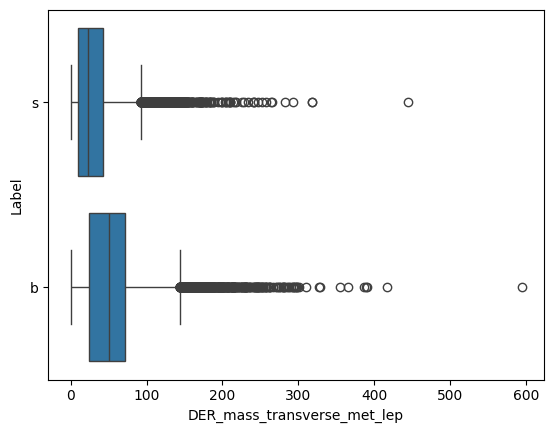

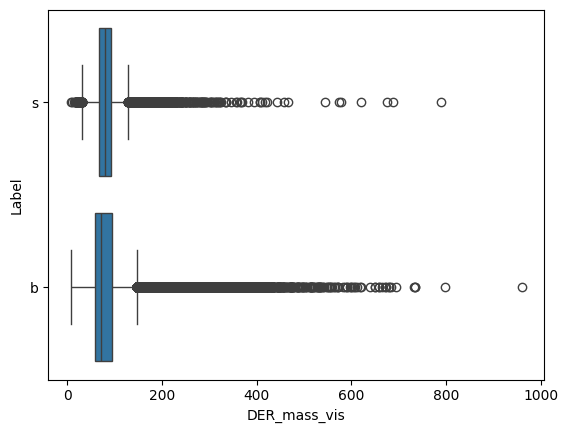

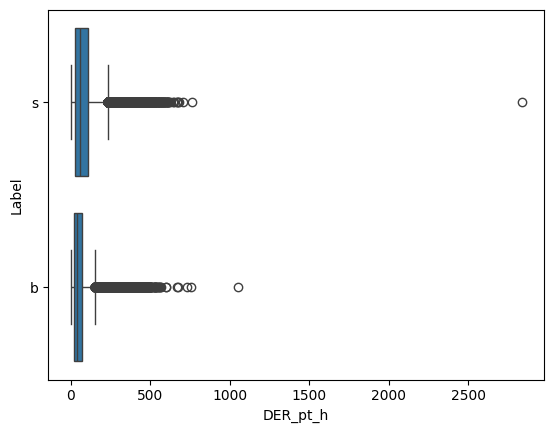

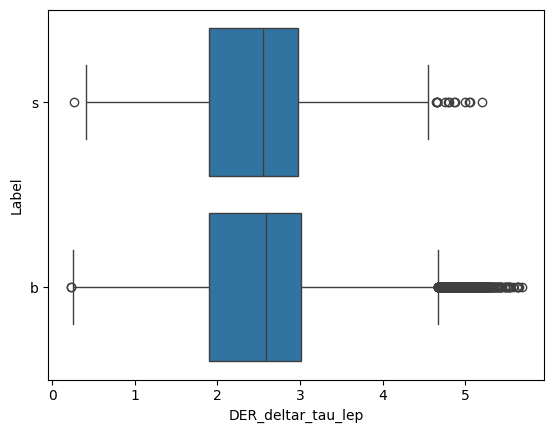

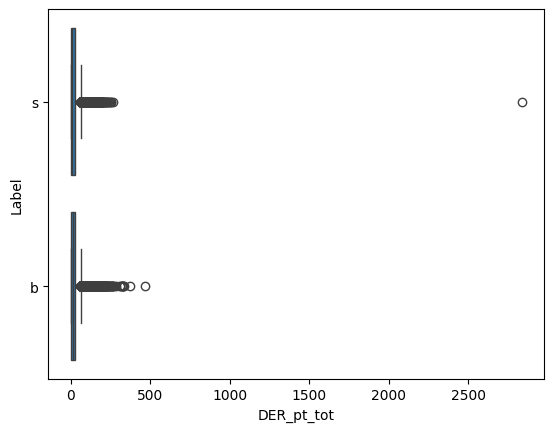

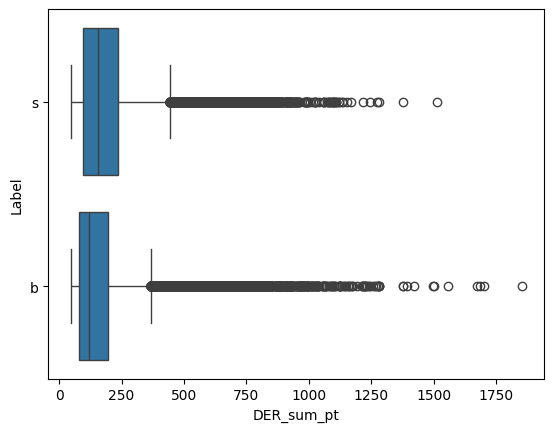

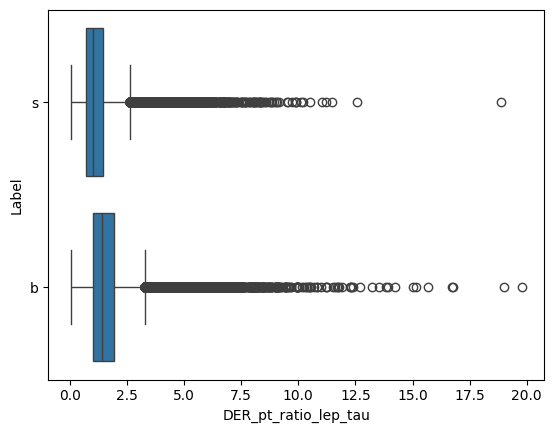

In [ ]:
#Checking relation between Labels and features with outliers.
for i in outliers_dre:
   sns.boxplot(x=i,data=data,y='Label')
   plt.show()

In [ ]:
# By above boxplot we can safely say that outliers are not indicative of some desirable event.
#Hence we would be doing outlier treatment.
for out in data[outliers_dre]:
  q3=data[out].quantile(0.75)
  q1=data[out].quantile(0.25)
  iqr=q3-q1
  upper=q3+1.5*iqr
  lower=q1-1.5*iqr
  data[out].clip(lower,upper,inplace=True)

**Univariate Analysis**

---



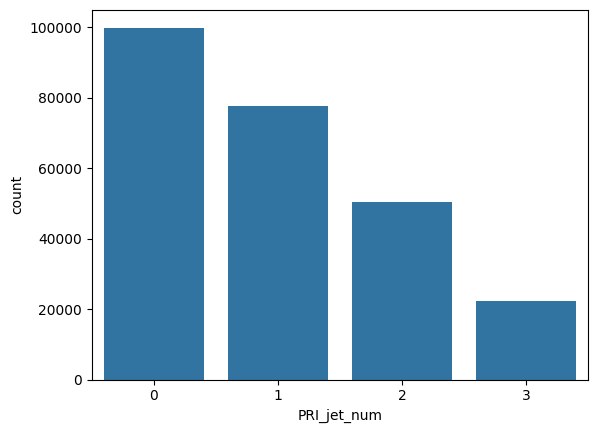

In [ ]:
# Primitive jet numbers
sns.countplot(x='PRI_jet_num',data=data)
plt.show()
#Highest number of jets present for this experiment is 1

In [ ]:
data.columns[data.dtypes=='float']

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta',
       'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

In [ ]:
data['DER_pt_ratio_lep_tau'].unique()

array([1.582, 0.879, 3.776, ..., 5.388, 7.916, 6.579])

<Axes: xlabel='DER_mass_transverse_met_lep', ylabel='Density'>

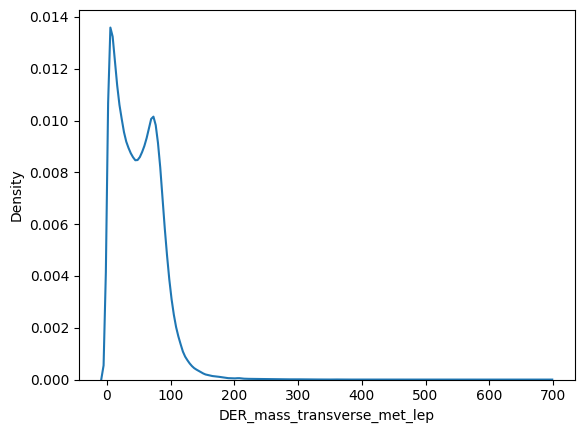

In [ ]:
sns.kdeplot(x='DER_mass_transverse_met_lep',data=data)

In [ ]:
lst = []
for i in data.columns:
    if data[i].min() == -999.0:
        lst.append(i)
lst

['DER_deltaeta_jet_jet',
 'DER_mass_jet_jet',
 'DER_prodeta_jet_jet',
 'DER_lep_eta_centrality',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi',
 'PRI_jet_subleading_pt',
 'PRI_jet_subleading_eta',
 'PRI_jet_subleading_phi']

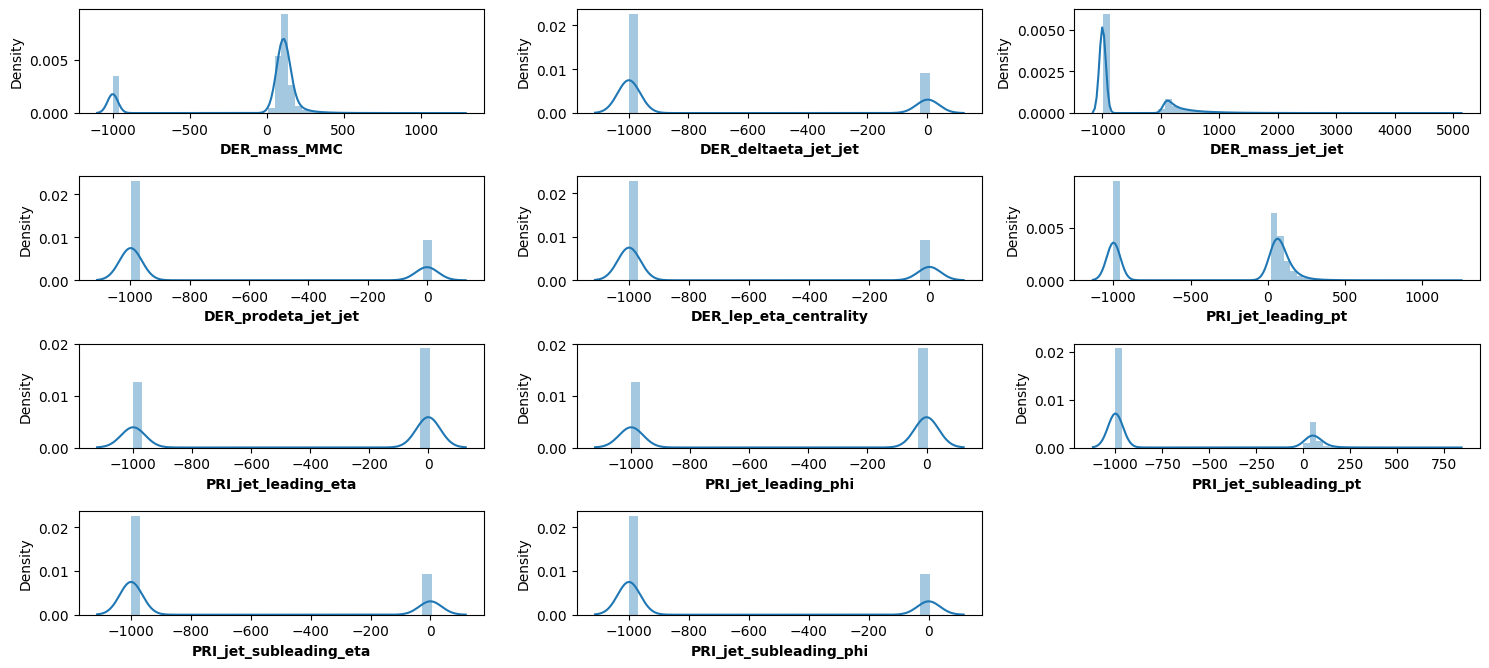

In [ ]:
plt.figure(figsize=(15, 100))
for i, col in enumerate(lst):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=data[col])
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [ ]:
# Most of the data has peak near zero so we can impute -999.0 to 0

In [ ]:
#Finding Data points which are not meaningful for the classifying purpose.

for i in data.columns:
  data[i] = np.where(data[i] == -999.0, 0, data[i])
#Data values of -999.0 deems meaningless hence nullifying them.

<Axes: ylabel='Density'>

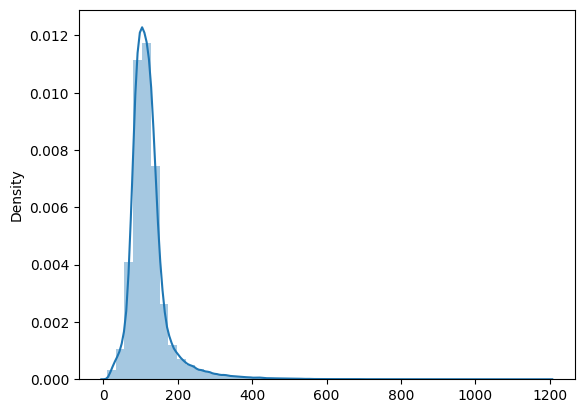

In [ ]:
sns.distplot(x=data['DER_mass_MMC'])

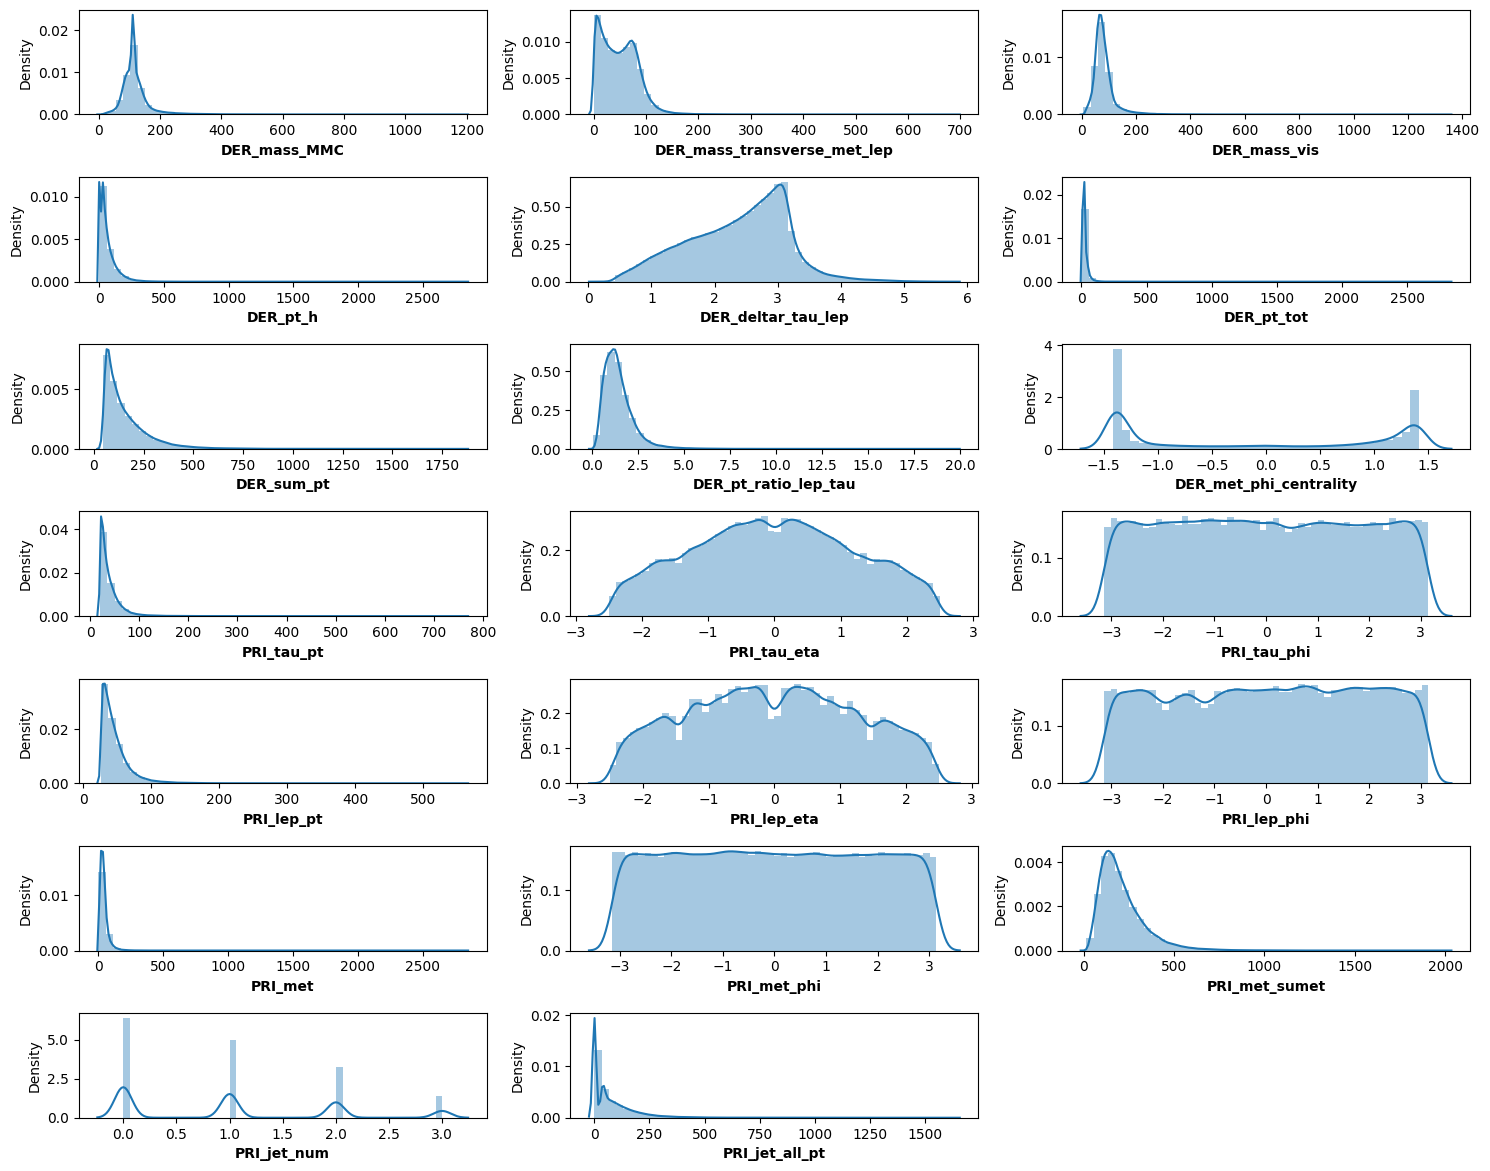

In [ ]:
#Plotting distribution for the numerical columns
numeric_features = [i for i in data.columns if data[i].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=data[col])
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

** Bivariate Analysis**

---



[]

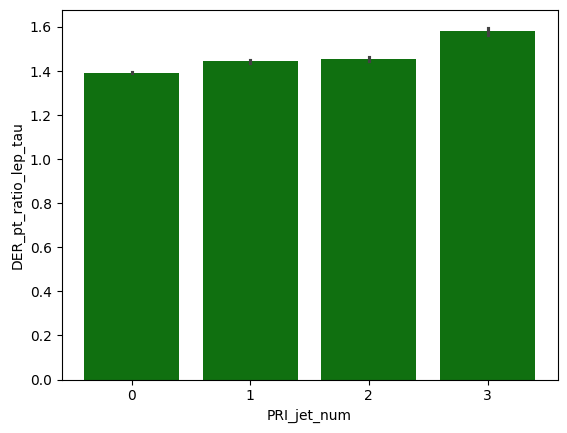

In [ ]:
#Relationship between separation of lepton and hadronic tau and numbers of jets
sns.barplot(x='PRI_jet_num',y='DER_pt_ratio_lep_tau',data=data,color='green')
plt.plot()

#As the R separation between hadronic tau and lepton increases so the number of jets released are also increased.

<Axes: xlabel='DER_mass_MMC', ylabel='PRI_met'>

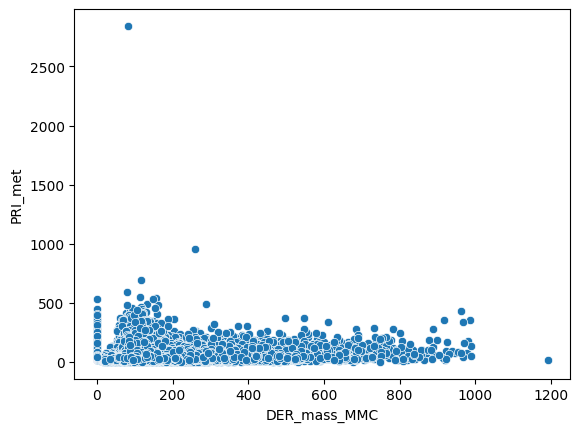

In [ ]:
sns.scatterplot(x=data['DER_mass_MMC'],y=data['PRI_met'])

'Momentum of hadronic tau particle is between 0 to 200 while the total energy in the detector is 0 to 1250.'

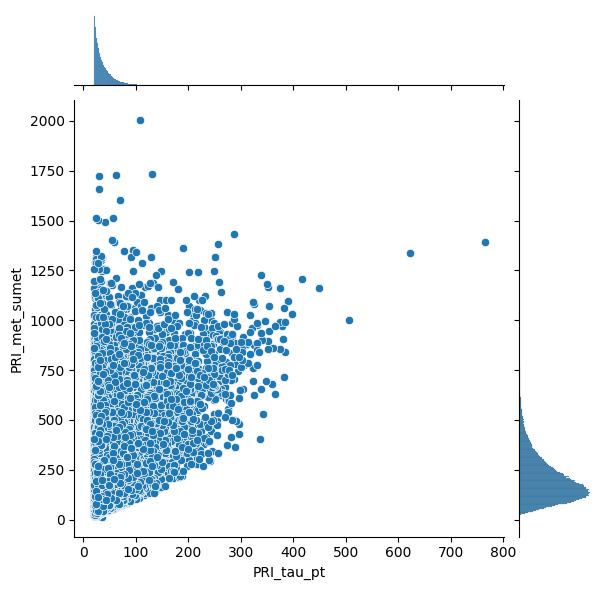

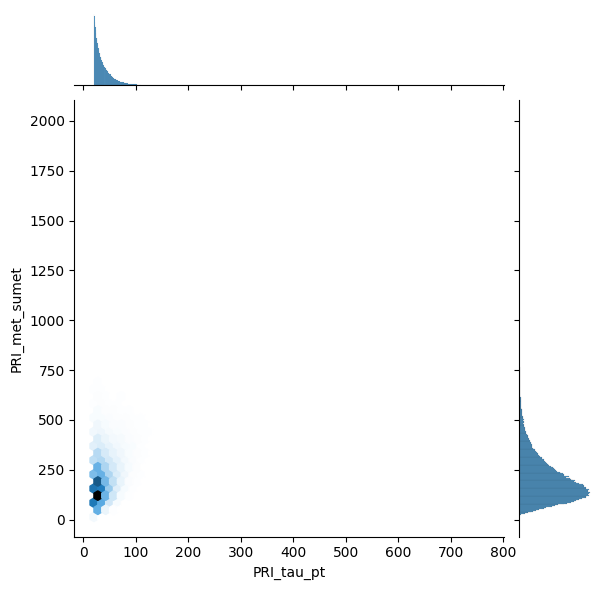

In [ ]:
# Transverse momentum for hadronic tau and total energy in the detector
sns.jointplot(x = data['PRI_tau_pt'], y = data['PRI_met_sumet'], kind = 'scatter')
# For Plot 2
sns.jointplot(x = data['PRI_tau_pt'], y = data['PRI_met_sumet'], kind = 'hex')

"""Momentum of hadronic tau particle is between 0 to 200 while the total energy in the detector is 0 to 1250."""

'Signal is present mostly where energy is between 0 and 300 whereas background is densely situated where energy from 0 to 400 '

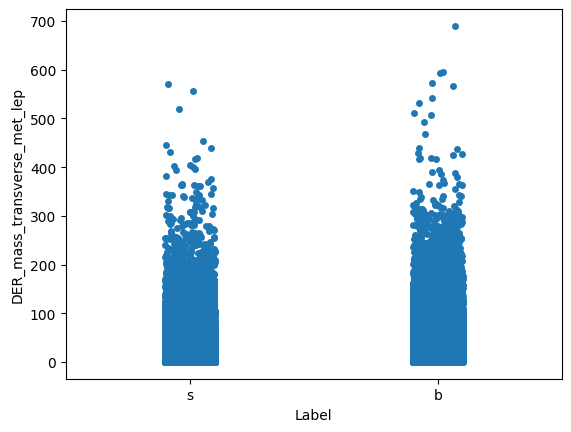

In [ ]:
#Relation between missing transverse energy - lepton and Label
#(to check at what values of missing energy signal is present and background particles are present.)
sns.stripplot(y = data['DER_mass_transverse_met_lep'], x = data['Label'])
"""Signal is present mostly where energy is between 0 and 300 whereas background is densely situated where energy from 0 to 400 """

<Axes: xlabel='PRI_jet_num', ylabel='count'>

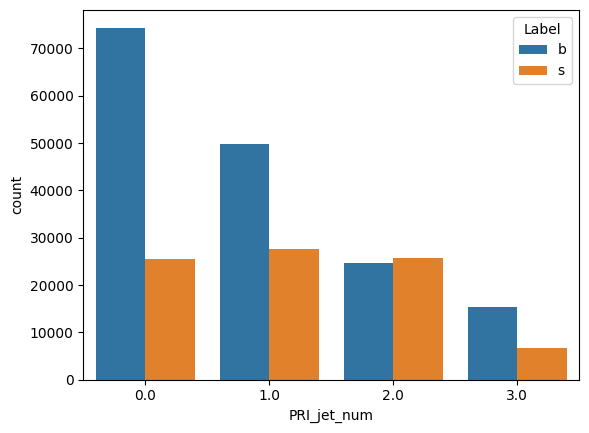

In [ ]:
# Total number of signals and background present for total number of jets
sns.countplot(x='PRI_jet_num',hue='Label',data=data)

**Most of the desired signal exists when there are two jets.**

In [ ]:
# How missing transverse energy affect the presence of signal and background particle.
data.pivot_table('PRI_met', index='Label')
#The mean of missing transverse energy for signal is higher than background particles.

,PRI_met
Label,
b,51.319736
s,59.092511


In [ ]:
# Finding relation between Primitive missing subleading transverse energy and at what are the mean values for
# signal and Background.
data.pivot_table('PRI_met_sumet', index='Label')
# The mean value of missing subleading transverse energy is higher for backgrounds compared to signal.

,PRI_met_sumet
Label,
b,342.958921
s,325.273170


<Axes: xlabel='Label', ylabel='DER_mass_MMC'>

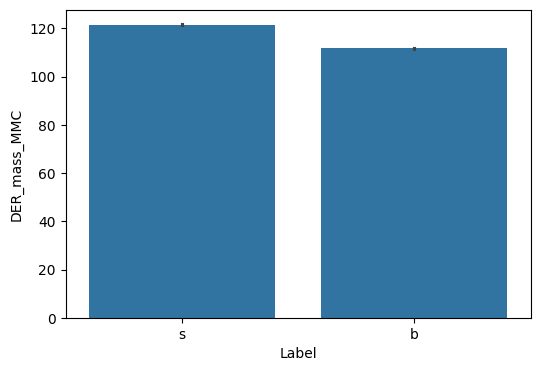

In [ ]:
# Plotting Barplot between Label and Derived mass of higgs boson candidate.
plt.figure(figsize=(6,4))
sns.barplot(x='Label',y='DER_mass_MMC',data=data)

In [ ]:
#Derived mass of higgs boson candidate is higher for desired event than background.

In [ ]:
import scipy.stats as stats

In [ ]:
# Anova test to find whether null hypothesis is true or not.
Null_Hypothesis='No significant difference in the mean of two groups.'
Alternate_Hyothesis="There are significant differences between Azimuthal angles of lepton, Hadron and azimuthal angle of missing transverse energy."


statistic, p_value = stats.f_oneway(data['PRI_tau_phi'],data['PRI_met_phi'],data['PRI_lep_phi'])
print("ANOVA F-statistic:", statistic)
print("P-value:", p_value)

# Check for statistical significance
alpha = 0.05
if p_value < alpha:
    print("Null Hypothesis rejected :",Alternate_Hyothesis)
else:
    print("Fail to reject null hypothesis :",Null_Hypothesis)

ANOVA F-statistic: 10.043537953874702
P-value: 4.348718187430018e-05
Null Hypothesis rejected : There are significant differences between Azimuthal angles of lepton, Hadron and azimuthal angle of missing transverse energy.


**Multivariate Analysis**:

---



<Axes: >

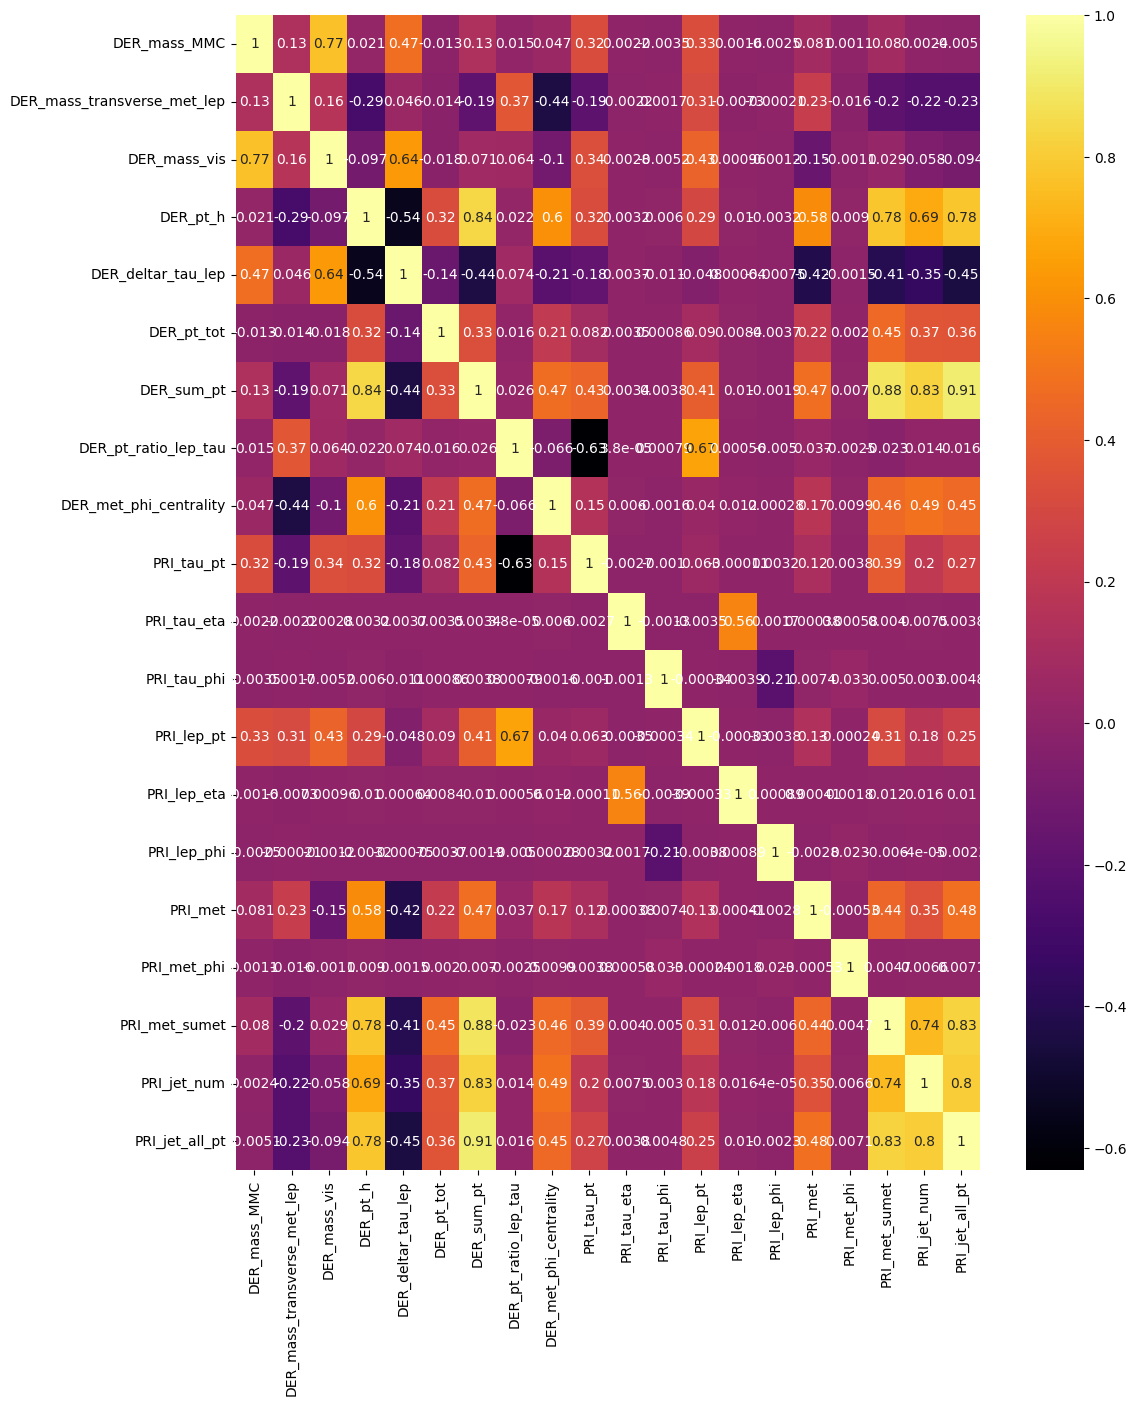

In [ ]:
#Correlation Analysis
plt.figure(figsize=(12,15))
sns.heatmap(data.corr(),annot=True,cmap='inferno')

In [ ]:
#Finding highly correlated features
cormat=data.corr()
lst=[]
for i in range(len(cormat.columns)):
    for j in range(i):
        if abs(cormat.iloc[i,j])>0.75:
            colname=cormat.columns[i]
            lst.append(colname)

#Dropping highly correlated features
uncor=data.drop(columns=lst)

#Keeping only uncorrelated features
result=uncor.columns
print(result)

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_prodeta_jet_jet',
       'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_pt_ratio_lep_tau',
       'DER_met_phi_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_eta',
       'PRI_jet_subleading_phi', 'Label'],
      dtype='object')


In [ ]:
data=data[result] #Uncorrelated columns

In [ ]:
encoding = {'s': 1, 'b': 0}
data['Label'] = data['Label'].map(encoding)

In [ ]:
data['Label']

EventId
100000    1
100001    0
100002    0
100003    0
100004    0
         ..
349995    0
349996    0
349997    1
349998    0
349999    0
Name: Label, Length: 250000, dtype: int64

In [ ]:
x = data.drop(['Label'],axis =1)
y = data['Label']

In [ ]:
y

EventId
100000    1
100001    0
100002    0
100003    0
100004    0
         ..
349995    0
349996    0
349997    1
349998    0
349999    0
Name: Label, Length: 250000, dtype: int64

**Train-Test-Split**


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

**RandomOverSampler**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Fit and apply the oversampler to the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(x_train, y_train)


**Model Selection**

---



In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train_resampled,y_train_resampled)

LogisticRegression()

In [ ]:
y_predlr=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lrtrain = model.score(X_train_resampled, y_train_resampled)
print("Training score: ",lrtrain)

lrtest = model.score(x_test, y_test)
print("Testing score: ",lrtest)

Training score:  0.7262198876464283
Testing score:  0.72218


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predlr))



              precision    recall  f1-score   support

           0       0.84      0.71      0.77     32784
           1       0.57      0.75      0.65     17216

    accuracy                           0.72     50000
   macro avg       0.71      0.73      0.71     50000
weighted avg       0.75      0.72      0.73     50000



In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc

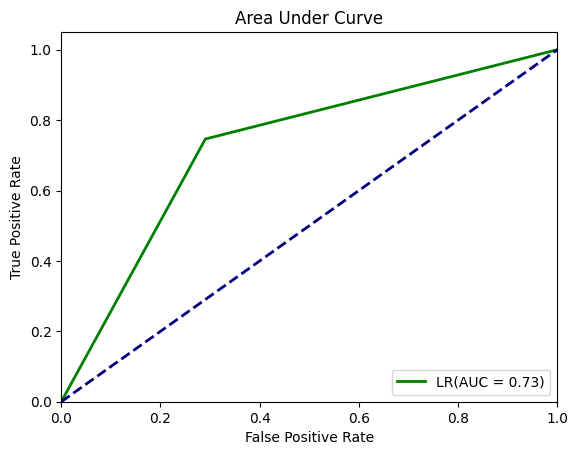

In [ ]:
fpr_lr, tpr_lr, _ = roc_curve(y_test,y_predlr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(1)
lw = 2
plt.plot(fpr_lr, tpr_lr, color='green',
         lw=lw, label='LR(AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Cross-Validation for Logistic Regression

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5)
print("Cross-validated Accuracy:", np.mean(scores))


Cross-validated Accuracy: 0.7382935518559323


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

dt_score_train = dt.score(X_train_resampled, y_train_resampled)
print("Training score: ",dt_score_train)

model_dt_o_score_test = dt.score(x_test, y_test)
print("Testing score: ",model_dt_o_score_test)


Training score:  1.0
Testing score:  0.7635


In [ ]:
y_predict = dt.predict(x_test)

In [ ]:
# Model is overfitting! To resolve this issue we would use HyperParametertuning technique

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Define the hyperparameter grid
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=5, cv=5, random_state=42)

# Fit the model
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: {:.2f}%".format(random_search.best_score_ * 100))


Best Parameters:  {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'gini'}
Best Accuracy: 81.13%


In [ ]:
dt = DecisionTreeClassifier(splitter='random',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=10,
    criterion='gini')

dt.fit(X_train_resampled, y_train_resampled)

dt_score_train = dt.score(X_train_resampled, y_train_resampled)
print("Training score: ",dt_score_train)

model_dt_o_score_test = dt.score(x_test, y_test)
print("Testing score: ",model_dt_o_score_test)


Training score:  0.8020243407399524
Testing score:  0.7962


In [ ]:
y_predict = dt.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84     32784
           1       0.67      0.80      0.73     17216

    accuracy                           0.80     50000
   macro avg       0.78      0.80      0.78     50000
weighted avg       0.81      0.80      0.80     50000



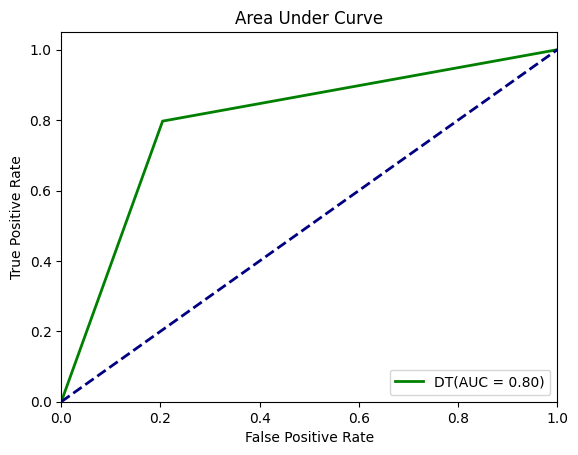

In [ ]:
fpr_lr, tpr_lr, _ = roc_curve(y_test,y_predict)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(1)
lw = 2
plt.plot(fpr_lr, tpr_lr, color='green',
         lw=lw, label='DT(AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()


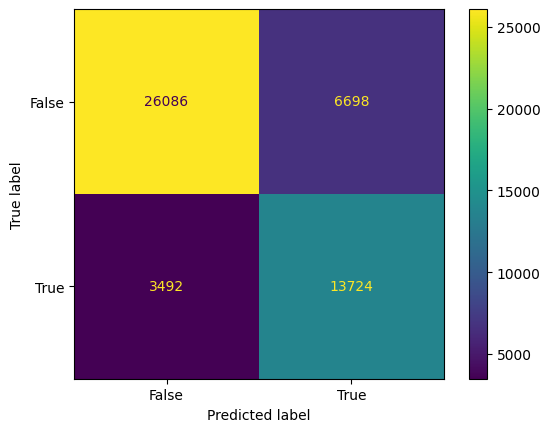

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train_resampled,y_train_resampled)
# Make predictions on the test set
y_pred = rf.predict(x_test)

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Test Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88     32784
           1       0.77      0.75      0.76     17216

    accuracy                           0.84     50000
   macro avg       0.82      0.82      0.82     50000
weighted avg       0.84      0.84      0.84     50000



In [ ]:
rf_score_train = rf.score(X_train_resampled, y_train_resampled)
print("Training score: ",rf_score_train)

model_dt_o_score_test = rf.score(x_test, y_test)
print("Testing score: ",model_dt_o_score_test)

Training score:  0.9999961991349231
Testing score:  0.83754


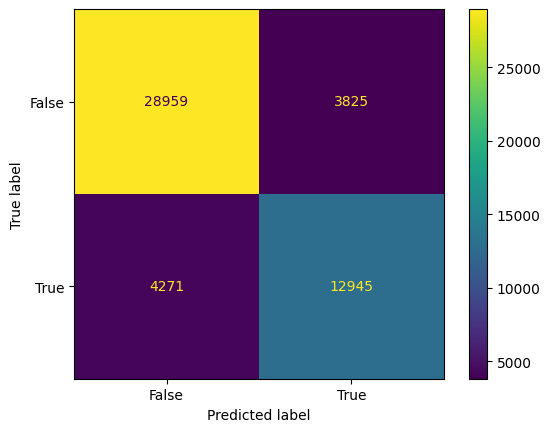

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
# To manage overfitting, by hit and try method I have found parameters that give tradeof between underfitting and overfitting

In [ ]:
rf.set_params(n_estimators=123,
                  criterion='gini',
                  max_features='auto',
                  max_depth= 10,
                  bootstrap = True,
                  warm_start=False,
                  oob_score=False)

RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=123)

In [ ]:
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=123)

In [ ]:
y_predrf = rf.predict(x_test)

In [ ]:
accuracy_rf = rf.score(X_train_resampled, y_train_resampled)
accuracy_rf = rf.score(x_test, y_test)
print("Here is our mean accuracy on the train set:\n {0:.3f}"\
      .format(accuracy_rf))

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the train set:
 0.814
Here is our mean accuracy on the test set:
 0.814


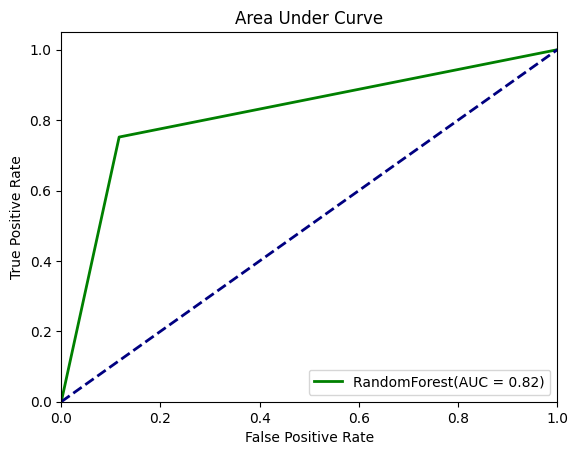

In [ ]:
fpr_lr, tpr_lr, _ = roc_curve(y_test,y_predrf)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(1)
lw = 2
plt.plot(fpr_lr, tpr_lr, color='green',
         lw=lw, label='RandomForest(AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predrf))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85     32784
           1       0.69      0.83      0.75     17216

    accuracy                           0.81     50000
   macro avg       0.80      0.82      0.80     50000
weighted avg       0.83      0.81      0.82     50000



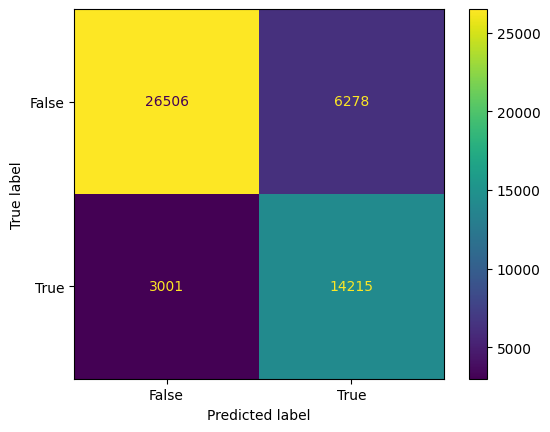

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_predrf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()